In [8]:
from imageVAE import *
from dataset_helper import *
import os
import matplotlib.pyplot as plt

In [2]:
vae = ImageVAE((128,128,3),[16,32],[32,16])

(128, 128, 3)
Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 432         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 32) 4608        conv2d[0][0]                     
__________________________________________________________________________________________________
flatten (Flatten)               (None, 524288)       0           conv2d_1[0][0]                   
______________________________________________________________________________

In [3]:
vae.load_weights("../models/abstract_vae")

In [5]:
names = ["../data/abstract_images/" + x for x in os.listdir("../data/abstract_images/") if ".jpg" in x][:100]

In [6]:
tensor = getTrainingTensor(names)

tensor = tensor.astype("float32") / 255

In [7]:
latentReg = vae.encoder.predict(tensor)

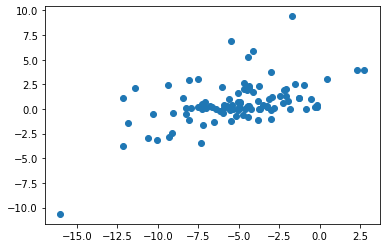

In [9]:
plt.scatter(latentReg[0][:,0],latentReg[0][:,1])


In [23]:
image = vae.decoder.predict(np.array([[5,10]]))[0]

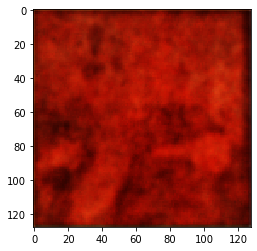

In [24]:
plt.imshow(image)

([], <a list of 0 Text yticklabel objects>)

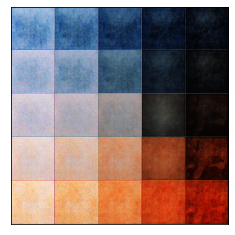

In [36]:
n = 5
digit_size = 128
figure = np.zeros((digit_size * n, digit_size * n,3))
# linearly spaced coordinates corresponding to the 2D plot
# of digit classes in the latent space
grid_x = np.linspace(min(latentReg[0][:,0]), max(latentReg[0][:,0]), n)
grid_y = np.linspace(min(latentReg[0][:,1]), max(latentReg[0][:,1]), n)

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)[0]

        #digit = x_decoded[0].reshape(digit_size, digit_size, 3)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
            :
        ] = x_decoded

plt.imshow(figure)
plt.xticks([])
plt.yticks([])

In [48]:
Image.fromarray(figure.astype(np.uint8)).save("../data/generated_abstract_images/abstract_collection.jpg")

In [40]:
figure = figure * 255
figure = figure.astype(int )

In [43]:
figure#%%


array([[[135, 144, 154],
        [147, 154, 183],
        [151, 159, 192],
        ...,
        [ 37,  45,  47],
        [ 42,  54,  53],
        [ 65,  75,  82]],

       [[144, 155, 197],
        [145, 172, 214],
        [139, 165, 221],
        ...,
        [ 10,  15,  19],
        [ 13,  19,  25],
        [ 33,  48,  57]],

       [[140, 158, 205],
        [140, 173, 225],
        [125, 176, 222],
        ...,
        [  6,   9,  15],
        [  8,  15,  21],
        [ 25,  40,  51]],

       ...,

       [[228, 177, 132],
        [236, 189, 130],
        [241, 185, 135],
        ...,
        [ 76,   5,   1],
        [ 67,   7,   2],
        [ 67,  18,  13]],

       [[219, 179, 119],
        [232, 184, 106],
        [240, 177,  96],
        ...,
        [ 53,   8,   2],
        [ 62,  10,   3],
        [ 67,  23,  17]],

       [[183, 154, 125],
        [195, 172, 117],
        [194, 172, 130],
        ...,
        [ 50,  22,  11],
        [ 59,  26,  17],
        [ 68,  52,  41]]